In [70]:
# import important modules 
import matplotlib.pyplot as plt
from IPython import display
from matplotlib import pyplot as plt
from matplotlib import rc, rcParams
from cycler import cycler
import numpy as np
import pandas as pd
import seaborn as sns
import math
from sklearn import preprocessing
from sklearn.base import TransformerMixin
from sklearn.base import BaseEstimator
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
%matplotlib inline

np.random.seed(7) 
import warnings ## importing warnings library. 
warnings.filterwarnings('ignore') ## Ignore warning

### Load and Process Data

In [2]:
# Load the training dataset
train_set = pd.read_csv('data/train_data_week_1_challenge.csv')

In [3]:
# show the first five rows
train_set.head()

,continue_drop,student_id,gender,caste,mathematics_marks,english_marks,science_marks,science_teacher,languages_teacher,guardian,internet,school_id,total_students,total_toilets,establishment_year
0,continue,s01746,M,BC,0.666,0.468,0.666,7,6,other,True,305,354,86.0,1986.0
1,continue,s16986,M,BC,0.172,0.420,0.172,8,10,mother,False,331,516,15.0,1996.0
2,continue,s00147,F,BC,0.212,0.601,0.212,1,4,mother,False,311,209,14.0,1976.0
3,continue,s08104,F,ST,0.434,0.611,0.434,2,5,father,True,364,147,28.0,1911.0
4,continue,s11132,F,SC,0.283,0.478,0.283,1,10,mother,True,394,122,15.0,1889.0


In [4]:
# show the list of columns
train_set.columns

Index(['continue_drop', 'student_id', 'gender', 'caste', 'mathematics_marks',
       'english_marks', 'science_marks', 'science_teacher',
       'languages_teacher', 'guardian', 'internet', 'school_id',
       'total_students', 'total_toilets', 'establishment_year'],
      dtype='object')

In [5]:
# show data information
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17190 entries, 0 to 17189
Data columns (total 15 columns):
continue_drop         17190 non-null object
student_id            17190 non-null object
gender                17190 non-null object
caste                 17190 non-null object
mathematics_marks     17190 non-null float64
english_marks         17190 non-null float64
science_marks         17190 non-null float64
science_teacher       17190 non-null int64
languages_teacher     17190 non-null int64
guardian              17190 non-null object
internet              17190 non-null bool
school_id             17190 non-null int64
total_students        17190 non-null int64
total_toilets         16878 non-null float64
establishment_year    16878 non-null float64
dtypes: bool(1), float64(5), int64(4), object(5)
memory usage: 1.9+ MB


In [6]:
# check the shape of the data
train_set.shape

(17190, 15)

In [7]:
# check the missing values
train_set.isnull().sum()*100/train_set.shape[0]

continue_drop         0.000000
student_id            0.000000
gender                0.000000
caste                 0.000000
mathematics_marks     0.000000
english_marks         0.000000
science_marks         0.000000
science_teacher       0.000000
languages_teacher     0.000000
guardian              0.000000
internet              0.000000
school_id             0.000000
total_students        0.000000
total_toilets         1.815009
establishment_year    1.815009
dtype: float64

In [8]:
# One percent of data is missing in the total_toilets and establishment_year columns. so let drop these columns
train_set.drop(['total_toilets', 'establishment_year'], axis = 1, inplace = True)

In [9]:
# check the data again
train_set.sample(10)

,continue_drop,student_id,gender,caste,mathematics_marks,english_marks,science_marks,science_teacher,languages_teacher,guardian,internet,school_id,total_students
12788,continue,s16191,F,BC,0.212,0.601,0.212,1,4,mother,False,397,221
509,continue,s12687,F,SC,0.687,0.483,0.687,6,10,mother,True,391,161
1222,continue,s11084,F,BC,0.594,0.519,0.594,4,8,mother,True,374,207
9545,continue,s04923,M,BC,0.023,0.441,0.023,6,3,mother,True,392,469
3528,continue,s02487,M,BC,0.730,0.502,0.730,6,3,mother,False,382,470
965,continue,s18676,M,SC,0.447,0.654,0.447,4,3,mother,True,392,469
3357,continue,s10184,M,ST,0.349,0.302,0.349,1,0,mother,True,337,185
2170,continue,s18572,M,OC,0.454,0.611,0.454,5,5,mother,True,363,148
388,continue,s05076,F,ST,0.389,0.582,0.389,4,6,mother,True,328,356
7460,continue,s14504,M,SC,0.511,0.403,0.511,4,5,mother,False,372,99


In [10]:
# Also let drop the student_id and school_id columns b'se does not have any contribution to the prediction
train_set.drop(['student_id', 'school_id'], axis=1, inplace=True)

In [11]:
# check the shape again
train_set.shape

(17190, 11)

In [12]:
# check the first five rows again
train_set.head()

,continue_drop,gender,caste,mathematics_marks,english_marks,science_marks,science_teacher,languages_teacher,guardian,internet,total_students
0,continue,M,BC,0.666,0.468,0.666,7,6,other,True,354
1,continue,M,BC,0.172,0.420,0.172,8,10,mother,False,516
2,continue,F,BC,0.212,0.601,0.212,1,4,mother,False,209
3,continue,F,ST,0.434,0.611,0.434,2,5,father,True,147
4,continue,F,SC,0.283,0.478,0.283,1,10,mother,True,122


In [13]:
# convert the object data types into integer data types
pre = preprocessing.LabelEncoder()
#train_set['continue_drop'] = pre.fit_transform(train_set['continue_drop'])
train_set['gender'] = pre.fit_transform(train_set['gender'])
train_set['caste'] = pre.fit_transform(train_set['caste'])
train_set['guardian'] = pre.fit_transform(train_set['guardian'])
train_set['internet'] = pre.fit_transform(train_set['internet'])

In [14]:
train_set = train_set.replace({'drop':0,'continue':1})

In [15]:
# let check our data again
train_set.head()

,continue_drop,gender,caste,mathematics_marks,english_marks,science_marks,science_teacher,languages_teacher,guardian,internet,total_students
0,1,1,0,0.666,0.468,0.666,7,6,3,1,354
1,1,1,0,0.172,0.420,0.172,8,10,2,0,516
2,1,0,0,0.212,0.601,0.212,1,4,2,0,209
3,1,0,3,0.434,0.611,0.434,2,5,0,1,147
4,1,0,2,0.283,0.478,0.283,1,10,2,1,122


In [16]:
train_set.tail()

,continue_drop,gender,caste,mathematics_marks,english_marks,science_marks,science_teacher,languages_teacher,guardian,internet,total_students
17185,0,1,0,0.389,0.216,0.389,6,5,2,1,571
17186,1,1,0,0.686,0.830,0.686,2,0,2,1,571
17187,1,0,0,0.390,0.497,0.390,3,2,2,1,35
17188,1,0,2,0.304,0.556,0.304,9,10,0,1,571
17189,1,0,2,0.566,0.495,0.566,0,4,0,1,280


In [17]:
# Also let check the last ten rows
train_set.tail(10)

,continue_drop,gender,caste,mathematics_marks,english_marks,science_marks,science_teacher,languages_teacher,guardian,internet,total_students
17180,1,0,3,0.522,0.568,0.522,5,6,2,0,97
17181,1,0,2,0.566,0.855,0.566,4,5,2,0,390
17182,1,0,0,0.646,0.804,0.646,8,0,2,1,113
17183,1,0,0,0.352,0.569,0.352,2,7,2,1,359
17184,1,0,2,0.464,0.593,0.464,8,4,2,1,344
17185,0,1,0,0.389,0.216,0.389,6,5,2,1,571
17186,1,1,0,0.686,0.830,0.686,2,0,2,1,571
17187,1,0,0,0.390,0.497,0.390,3,2,2,1,35
17188,1,0,2,0.304,0.556,0.304,9,10,0,1,571
17189,1,0,2,0.566,0.495,0.566,0,4,0,1,280


In [18]:
# check the data information again
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17190 entries, 0 to 17189
Data columns (total 11 columns):
continue_drop        17190 non-null int64
gender               17190 non-null int64
caste                17190 non-null int64
mathematics_marks    17190 non-null float64
english_marks        17190 non-null float64
science_marks        17190 non-null float64
science_teacher      17190 non-null int64
languages_teacher    17190 non-null int64
guardian             17190 non-null int64
internet             17190 non-null int64
total_students       17190 non-null int64
dtypes: float64(3), int64(8)
memory usage: 1.4 MB


### check the correlation of data

In [19]:
# check the dataset corretion
train_set_corr  = train_set.corr()

In [20]:
pd.DataFrame(abs(train_set_corr['continue_drop']).sort_values(ascending=False))

,continue_drop
continue_drop,1.000000
science_teacher,0.127864
english_marks,0.073242
internet,0.060419
caste,0.049724
gender,0.043430
languages_teacher,0.018842
guardian,0.014514
science_marks,0.007258
mathematics_marks,0.007258


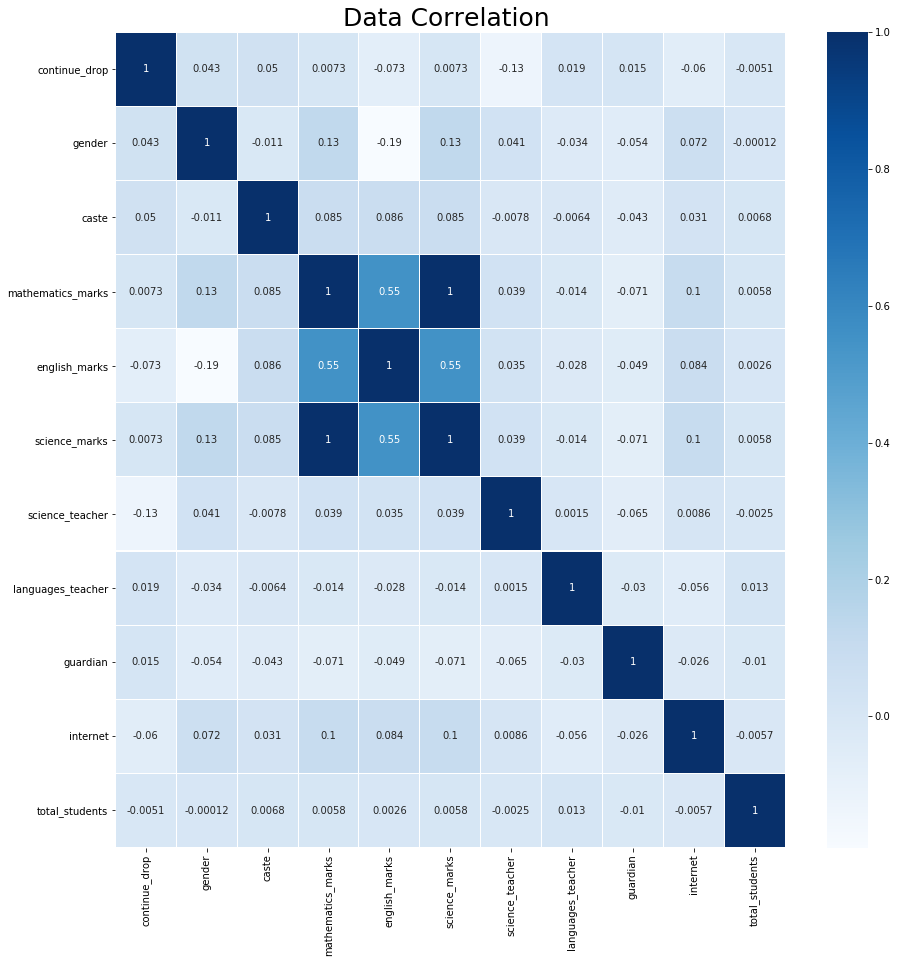

In [21]:
#create the correlation matrix heat map
plt.figure(figsize=(15,15))

plt.title("Data Correlation ", fontsize = 25)
sns.heatmap(train_set_corr,linewidths=.1,cmap="Blues", annot=True)
plt.yticks(rotation=0);

In [22]:
# check the dataset again
train_set.head()

,continue_drop,gender,caste,mathematics_marks,english_marks,science_marks,science_teacher,languages_teacher,guardian,internet,total_students
0,1,1,0,0.666,0.468,0.666,7,6,3,1,354
1,1,1,0,0.172,0.420,0.172,8,10,2,0,516
2,1,0,0,0.212,0.601,0.212,1,4,2,0,209
3,1,0,3,0.434,0.611,0.434,2,5,0,1,147
4,1,0,2,0.283,0.478,0.283,1,10,2,1,122


In [23]:
# check the statistical details of the dataset
train_set.describe()

,continue_drop,gender,caste,mathematics_marks,english_marks,science_marks,science_teacher,languages_teacher,guardian,internet,total_students
count,17190.000000,17190.000000,17190.000000,17190.00000,17190.000000,17190.00000,17190.000000,17190.000000,17190.000000,17190.000000,17190.000000
mean,0.953112,0.481210,0.886097,0.52032,0.562741,0.52032,3.973589,5.240663,1.564398,0.849156,273.747062
std,0.211405,0.499661,0.997261,0.20943,0.173250,0.20943,2.454141,2.949883,0.889307,0.357907,131.355868
min,0.000000,0.000000,0.000000,0.02300,0.077000,0.02300,0.000000,0.000000,0.000000,0.000000,15.000000
25%,1.000000,0.000000,0.000000,0.37300,0.450000,0.37300,2.000000,3.000000,2.000000,1.000000,177.000000
50%,1.000000,0.000000,0.000000,0.51300,0.560000,0.51300,4.000000,5.000000,2.000000,1.000000,262.000000
75%,1.000000,1.000000,2.000000,0.67400,0.667000,0.67400,6.000000,7.000000,2.000000,1.000000,384.000000
max,1.000000,1.000000,3.000000,1.03200,1.010000,1.03200,9.000000,12.000000,3.000000,1.000000,571.000000


In [25]:
#rearange columns
train_set['target'] = train_set.continue_drop.copy()
train_set = train_set.drop('continue_drop',axis=1)

In [26]:
# check the dataset again
train_set.head()

,gender,caste,mathematics_marks,english_marks,science_marks,science_teacher,languages_teacher,guardian,internet,total_students,target
0,1,0,0.666,0.468,0.666,7,6,3,1,354,1
1,1,0,0.172,0.420,0.172,8,10,2,0,516,1
2,0,0,0.212,0.601,0.212,1,4,2,0,209,1
3,0,3,0.434,0.611,0.434,2,5,0,1,147,1
4,0,2,0.283,0.478,0.283,1,10,2,1,122,1


### Check distribution of class

In [28]:
# check distributon of class if there is the data imbalance or not
train_set.target.value_counts()

1    16384
0      806
Name: target, dtype: int64

In [27]:
train_set['target'].value_counts()

1    16384
0      806
Name: target, dtype: int64

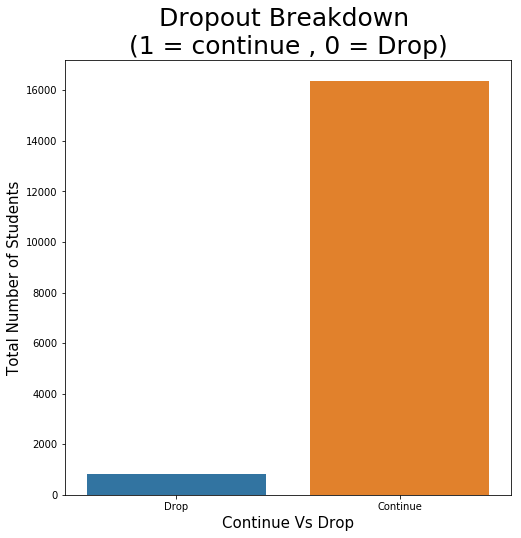

In [35]:
# Visualize the target column 
plt.figure(figsize=(8,8))
sns.countplot(data = train_set, x = 'target')
plt.title("Dropout Breakdown \n (1 = continue , 0 = Drop) ", fontsize = 25)
plt.xlabel("Continue Vs Drop", fontsize = 15);
plt.ylabel("Total Number of Students", fontsize = 15);
labels = ['Continue','Drop']
val = [1,0] 
plt.xticks(val, labels);

### Handling Imbalance class

In [36]:
#handling imbalance class
train_set_majority = train_set[train_set['target']==1]
train_set_minority = train_set[train_set['target']==0]

In [37]:
#check the shape of majority class
train_set_majority.shape

(16384, 11)

In [38]:
#check the shape of minority class
train_set_minority.shape

(806, 11)

In [39]:
# get class counts 
count_1,count_0 = train_set['target'].value_counts()

In [40]:
# upsampling majority class
upsampled = train_set_minority.sample(count_1,replace=True)

In [41]:
train_set_balanced1 = pd.concat([upsampled,train_set_majority], axis = 0)

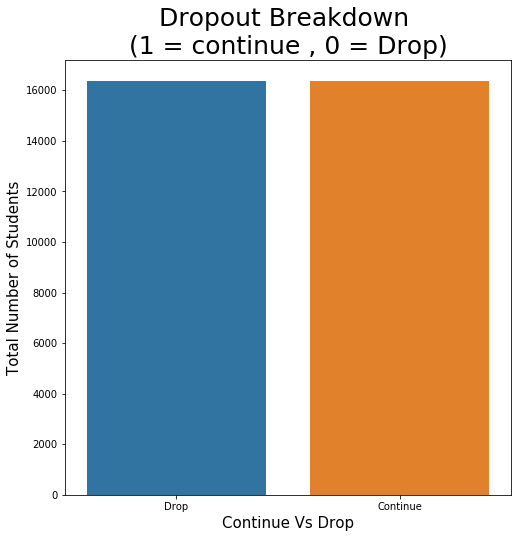

In [43]:
# Visualize the target column again 
plt.figure(figsize=(8,8))
sns.countplot(train_set_balanced1['target'])
plt.title("Dropout Breakdown \n (1 = continue , 0 = Drop) ", fontsize = 25)
plt.xlabel("Continue Vs Drop", fontsize = 15);
plt.ylabel("Total Number of Students", fontsize = 15);
labels = ['Continue','Drop']
val = [1,0] 
plt.xticks(val, labels);

In [44]:
#down sapmle 
downsampled = train_set_majority.sample(count_1,random_state=100)

In [45]:
train_set_balanced = pd.concat([upsampled,downsampled], axis = 0)

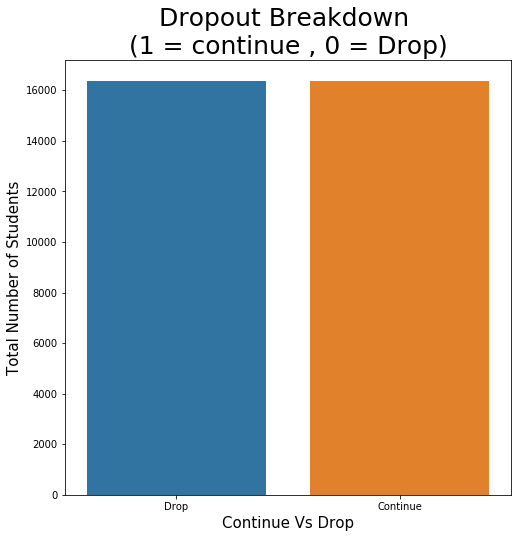

In [46]:
# Visualize the target column again 
plt.figure(figsize=(8,8))
sns.countplot(train_set_balanced['target'])
plt.title("Dropout Breakdown \n (1 = continue , 0 = Drop) ", fontsize = 25)
plt.xlabel("Continue Vs Drop", fontsize = 15);
plt.ylabel("Total Number of Students", fontsize = 15);
labels = ['Continue','Drop']
val = [1,0] 
plt.xticks(val, labels);

In [47]:
# check distributon of class again
train_set_balanced['target'].value_counts()

1    16384
0    16384
Name: target, dtype: int64

### Preparing the data

In [50]:
#split the data into features and labels
target = train_set_balanced['target'].copy()
features= train_set_balanced.drop('target',axis=1)

In [55]:
# split the dataset into train and test set
from sklearn.model_selection import train_test_split
train_set,test_set,train_label,test_label = train_test_split(features, target, test_size=0.2, random_state=1)

In [56]:
#check the shape of train set
train_set.shape

(26214, 10)

In [57]:
#check the shape of test set
test_set.shape

(6554, 10)

In [62]:
#create piplines for processing dataset
# seprate categorical attributes from numerical attributes 
#also create a custome class for attribute selection
# that if the pipeline is for numerical it can select the numerical values and
# leave categorical and vice versa
class DataFrameSelection(TransformerMixin,BaseEstimator):
    def __init__(self,attributes_names):
        self.attributes_names = attributes_names 
    def fit(self,X,y=0):
        return self
    def transform(self,X,y=None):
        return X[self.attributes_names].values

In [63]:
numerical_attribute = ['gender', 'caste', 'mathematics_marks', 'english_marks', 'science_marks', 'science_teacher', 'languages_teacher', 'guardian', 'internet', 'total_students']

In [64]:
#check the features data
features.head()

,gender,caste,mathematics_marks,english_marks,science_marks,science_teacher,languages_teacher,guardian,internet,total_students
8181,0,0,0.551,0.820,0.551,4,9,2,1,390
16426,1,1,0.359,0.521,0.359,2,7,3,1,240
10017,1,3,0.749,1.010,0.749,4,6,0,1,287
11073,0,0,0.623,0.699,0.623,6,0,0,1,399
6601,0,0,0.503,0.523,0.503,9,0,0,1,353


In [69]:
# fill the null values by using mean
numerical_pipeline = Pipeline([('selector',DataFrameSelection(numerical_attribute)),
                              ('scaler',MaxAbsScaler()),
                              ('imputer',Imputer(strategy='mean'))])

In [71]:
final_pipeline = FeatureUnion(transformer_list=[('num_pippeline',numerical_pipeline)])

In [72]:
prepared_data = final_pipeline.fit_transform(train_set)

In [75]:
#put the prepared data into Dataframe
train_df = pd.DataFrame(prepared_data)

In [76]:
#check the data
train_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.000000,0.395349,0.790099,0.395349,1.000000,0.416667,0.666667,1.0,0.385289
1,0.0,0.333333,0.620155,0.703960,0.620155,0.888889,0.833333,0.666667,1.0,0.683012
2,0.0,0.000000,0.430233,0.553465,0.430233,0.111111,0.000000,0.666667,1.0,0.211909
3,0.0,0.000000,0.342054,0.564356,0.342054,0.555556,0.333333,1.000000,1.0,0.429072
4,1.0,0.666667,0.167636,0.512871,0.167636,0.888889,0.250000,0.666667,1.0,0.753065


### Training the model

In [77]:
# Training the Model by using the K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(train_df,train_label)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [78]:
test_prepared = final_pipeline.fit_transform(test_set)

In [80]:
# Make the Prediction
y_pred = KNN.predict(test_prepared)

### Evaluating the Model

In [81]:
#find the accuracy of the model 
print("K Nearest Neighbor accuaracy : ", KNN.score(test_prepared,test_label))

K Nearest Neighbor accuaracy :  0.9996948428440647


In [84]:
#find f1_score
from sklearn.metrics import f1_score
print("KNN F1_score : ", f1_score(test_label,y_pred))

KNN F1_score :  0.9996876951905059


In [86]:
#find fbeta_score 
from sklearn.metrics import fbeta_score
print("FBeta score : ", fbeta_score(test_label,y_pred,beta=0.1))

FBeta score :  0.9999938138526397


In [90]:
# use confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(test_label,y_pred)

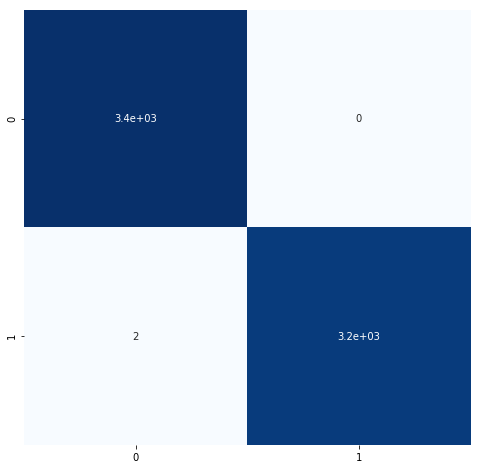

In [91]:
#plot the confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(conf_matrix,annot=True,cmap="Blues",cbar=False)

In [92]:
# Mean Square Error
from sklearn.metrics import mean_squared_error
KNN_error = mean_squared_error(test_label, y_pred)
print("Mean Square Error: {}" .format(KNN_error))

Mean Square Error: 0.0003051571559353067


In [93]:
#print log_loss
from sklearn.metrics import log_loss
print("Log loss : ",log_loss(test_label,y_pred))

Log loss :  0.010539754774157447


### Load the test Data

In [135]:
#import the test set 
test_set_og = pd.read_csv('data/test_data_week_1_challenge.csv')

In [136]:
#check the first five rows
test_set_og.head()

,student_id,gender,caste,mathematics_marks,english_marks,science_marks,science_teacher,languages_teacher,guardian,internet,school_id,total_students,total_toilets,establishment_year
0,s00529,F,BC,0.212,0.601,0.212,1,4,mother,False,341,430,44.0,1959.0
1,s13519,F,BC,0.511,0.551,0.511,1,5,mother,True,329,275,60.0,1914.0
2,s01753,M,BC,0.890,0.644,0.890,2,2,mother,True,390,140,14.0,1972.0
3,s00034,F,BC,0.355,0.373,0.355,7,4,mother,True,336,206,17.0,1940.0
4,s03027,F,BC,0.691,0.147,0.691,4,3,father,True,361,287,15.0,1992.0


In [137]:
#drop the unneeded columns 
test_set_og.drop(['student_id', 'school_id', 'total_toilets', 'establishment_year'], axis=1, inplace=True)

In [138]:
#check the data
test_set_og.head()

,gender,caste,mathematics_marks,english_marks,science_marks,science_teacher,languages_teacher,guardian,internet,total_students
0,F,BC,0.212,0.601,0.212,1,4,mother,False,430
1,F,BC,0.511,0.551,0.511,1,5,mother,True,275
2,M,BC,0.890,0.644,0.890,2,2,mother,True,140
3,F,BC,0.355,0.373,0.355,7,4,mother,True,206
4,F,BC,0.691,0.147,0.691,4,3,father,True,287


In [139]:
# convert the object data types into integer data types
pre = preprocessing.LabelEncoder()
test_set_og['gender'] = pre.fit_transform(test_set_og['gender'])
test_set_og['caste'] = pre.fit_transform(test_set_og['caste'])
test_set_og['guardian'] = pre.fit_transform(test_set_og['guardian'])
test_set_og['internet'] = pre.fit_transform(test_set_og['internet'])

In [148]:
#check the data again
test_set_og.head()

,gender,caste,mathematics_marks,english_marks,science_marks,science_teacher,languages_teacher,guardian,internet,total_students
0,0,0,0.212,0.601,0.212,1,4,2,0,430
1,0,0,0.511,0.551,0.511,1,5,2,1,275
2,1,0,0.890,0.644,0.890,2,2,2,1,140
3,0,0,0.355,0.373,0.355,7,4,2,1,206
4,0,0,0.691,0.147,0.691,4,3,0,1,287


In [140]:
prepared_test_og = final_pipeline.fit_transform(test_set_og)

In [142]:
# Make the prediction and convert into Dataframe
predictions = KNN.predict(prepared_test_og)
predictions = pd.DataFrame(predictions,columns=['predictions'])

In [157]:
# save the prediction in .npy format
predictions.to_csv('predictions/predictions.npy ')

In [158]:
# save the prediction in .csv format
predictions.to_csv('predictions/predictions.csv ')

In [159]:
# find the prediction probability and put into Dataframe
prediction_probability = KNN.predict_proba(prepared_test_og)
prediction_probability = pd.DataFrame(prediction_probability,columns=['predict_proba_0','predict_proba_1'])

In [160]:
# save the prediction probability
prediction_probability.to_csv('predictions/prediction_proba.csv')

In [161]:
#save model
from sklearn.externals import joblib
joblib.dump(KNN,'model/KNN.pkl')

['model/KNN.pkl']

### Train and Evaluate the Model 

In [171]:
# Training the model by using Decision tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='gini',max_depth=10,max_features=10)
tree.fit(train_df, train_label)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [172]:
# Make the Prediction
y_pred = tree.predict(test_prepared)

In [173]:
#find the accuracy of the model 
print("Decision tree accuaracy : ", tree.score(test_prepared,test_label))

Decision tree accuaracy :  0.9859627708269759


In [174]:
#find f1_score
from sklearn.metrics import f1_score
print("Tree F1_score : ", f1_score(test_label,y_pred))

Tree F1_score :  0.9854292049414002


In [175]:
#find fbeta_score 
from sklearn.metrics import fbeta_score
print("FBeta score : ", fbeta_score(test_label,y_pred,beta=0.1))

FBeta score :  0.9997072888263873


In [176]:
# use confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(test_label,y_pred)

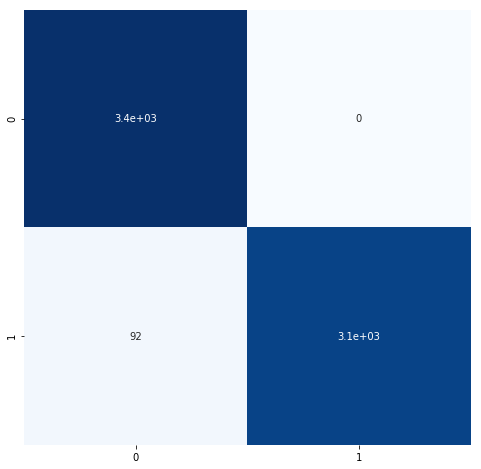

In [177]:
#plot the confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(conf_matrix,annot=True,cmap="Blues",cbar=False)

In [178]:
# Mean Square Error
from sklearn.metrics import mean_squared_error
tree_error = mean_squared_error(test_label, y_pred)
print("Mean Square Error: {}" .format(tree_error))

Mean Square Error: 0.014037229173024107


In [179]:
#print log_loss
from sklearn.metrics import log_loss
print("Log loss : ",log_loss(test_label,y_pred))

Log loss :  0.48482871961119756


In [181]:
# Make the prediction and convert into Dataframe
predict = tree.predict(prepared_test_og)
predict = pd.DataFrame(predict,columns=['predictions'])

In [182]:
# save the prediction in .csv format
predict.to_csv('predictions/predictions_tree.csv ')

In [183]:
#save model
from sklearn.externals import joblib
joblib.dump(KNN,'model/Tree.pkl')

['model/Tree.pkl']